### Import libraries


In [11]:
# Standard libraries
import logging

# Third-party libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,classification_report
import joblib

### Configure logging

In [12]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

### Load and preprocess data

In [13]:
# Load dataset
logger.info("Loading dataset")
data = pd.read_csv("D:/brototype/week27/ML/ML_module/ml_codes/data/raw/Weather-related disease prediction.csv")

2025-08-09 13:33:22,217 - INFO - Loading dataset


In [14]:
# Handle missing values
data = data.dropna()
logger.info("Dropped rows with missing values")

2025-08-09 13:33:22,429 - INFO - Dropped rows with missing values


In [15]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['prognosis'] = label_encoder.fit_transform(data['prognosis'])
logger.info('Encoded categorical variables')

2025-08-09 13:33:22,507 - INFO - Encoded categorical variables


### Feature Engineering - Lag variables

In [16]:
# Create lag features and fill missing with mean
data['Temperature_lag1'] = data['Temperature (C)'].shift(1).fillna(data['Temperature (C)'].mean())
data['Humidity_lag1'] = data['Humidity'].shift(1).fillna(data['Humidity'].mean())
data['WindSpeed_lag1'] = data['Wind Speed (km/h)'].shift(1).fillna(data['Wind Speed (km/h)'].mean())
logger.info("Added lag features")

2025-08-09 13:33:22,553 - INFO - Added lag features


### Define Features and Target

In [17]:
# Explicitly include the required columns only once
initial_features = [
    'Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Temperature_lag1', 'Humidity_lag1', 'WindSpeed_lag1'
]

# Add other features (excluding target)
remaining_features = [
    col for col in data.columns if col not in initial_features + ['prognosis']
]

# Combine feature columns
feature_cols = list(dict.fromkeys(initial_features + remaining_features))

# Feature matrix and target vector
X = data[feature_cols]
y = data['prognosis']
logger.info("Defined features and target")

2025-08-09 13:33:22,592 - INFO - Defined features and target


### Split Data and Train Models

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logger.info("Split data into training and test sets")

# Model initialization
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
logger.info("Trained RandomForest and XGBoost models")

2025-08-09 13:33:22,649 - INFO - Split data into training and test sets
2025-08-09 13:33:24,923 - INFO - Trained RandomForest and XGBoost models


### Example usage

In [19]:
import sys
import os
import traceback

# src path for predict.py
sys.path.append(r"D:/brototype/week27/ML/ML_module/ml_codes/src")

from predict import predict_disease

# Symptom columns
symptom_columns = [
    'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills', 'fatigue',
    'runny_nose', 'pain_behind_the_eyes', 'dizziness', 'headache', 'chest_pain',
    'vomiting', 'cough', 'shivering', 'asthma_history', 'high_cholesterol',
    'diabetes', 'obesity', 'hiv_aids', 'nasal_polyps', 'asthma',
    'high_blood_pressure', 'severe_headache', 'weakness', 'trouble_seeing',
    'fever', 'body_aches', 'sore_throat', 'sneezing', 'diarrhea',
    'rapid_breathing', 'rapid_heart_rate', 'pain_behind_eyes', 'swollen_glands',
    'rashes', 'sinus_headache', 'facial_pain', 'shortness_of_breath',
    'reduced_smell_and_taste', 'skin_irritation', 'itchiness', 'throbbing_headache',
    'confusion', 'back_pain', 'knee_ache'
]

# User input
user_input = {
    'age': 30,
    'gender': 'male',
    'temperature': 25.0,
    'humidity': 0.7,
    'wind_speed': 10.0,
    'symptoms': ['nausea', 'high_fever']
}

# Model paths
model_path = "../../models/trained_model.pkl"
label_path = "../../models/label_encoder.pkl"

# Prediction
try:
    disease = predict_disease(
        user_input,
        model_path,
        label_path,
        symptom_columns
    )
    print(f"Predicted Disease: {disease}")
except Exception as e:
    print(f"Prediction failed: {str(e)}")
    traceback.print_exc()


2025-08-09 13:33:24,954 - INFO - Starting disease prediction...
2025-08-09 13:33:24,956 - INFO - Normalized symptoms: ['nausea', 'high_fever']
2025-08-09 13:33:25,039 - INFO - Model and label encoder loaded successfully.
2025-08-09 13:33:25,040 - INFO - Using raw weather data from user input.
2025-08-09 13:33:25,047 - INFO - Input data prepared for prediction.
2025-08-09 13:33:25,060 - WARNING - Prediction confidence is below threshold.


Predicted Disease: Prediction confidence is low. Please consult a healthcare provider.


### Evaluation Section

Random Forest Performance:
Accuracy:  0.9856
Recall:    0.9856
Precision: 0.9860
F1-Score:  0.9856

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.92      0.98      0.95        59
           2       0.98      0.98      0.98        58
           3       1.00      1.00      1.00        68
           4       1.00      0.99      0.99       192
           5       0.97      1.00      0.99        71
           6       0.99      0.96      0.98       136
           7       1.00      0.98      0.99        61
           8       0.98      1.00      0.99       201
           9       1.00      1.00      1.00        57
          10       0.99      0.95      0.97        79

    accuracy                           0.99      1040
   macro avg       0.98      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040



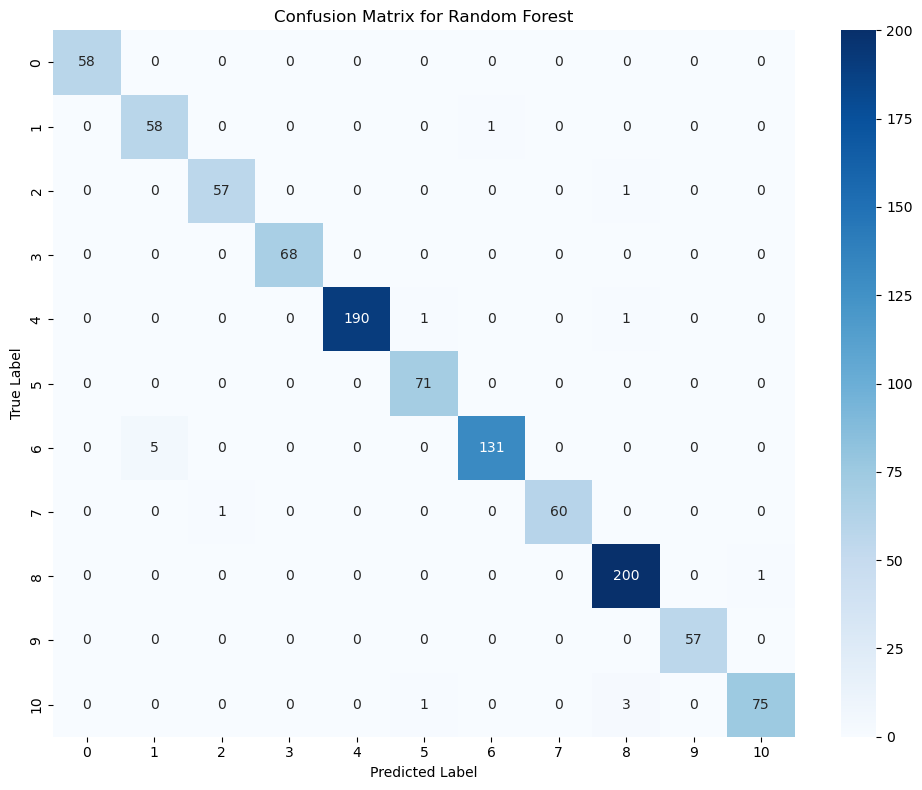

XGBoost Performance:
Accuracy:  0.9846
Recall:    0.9846
Precision: 0.9850
F1-Score:  0.9847

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.92      0.97      0.94        59
           2       0.98      0.98      0.98        58
           3       1.00      1.00      1.00        68
           4       1.00      0.99      0.99       192
           5       0.97      0.99      0.98        71
           6       0.99      0.96      0.98       136
           7       1.00      0.98      0.99        61
           8       0.97      1.00      0.98       201
           9       1.00      1.00      1.00        57
          10       0.99      0.96      0.97        79

    accuracy                           0.98      1040
   macro avg       0.98      0.98      0.98      1040
weighted avg       0.98      0.98      0.98      1040



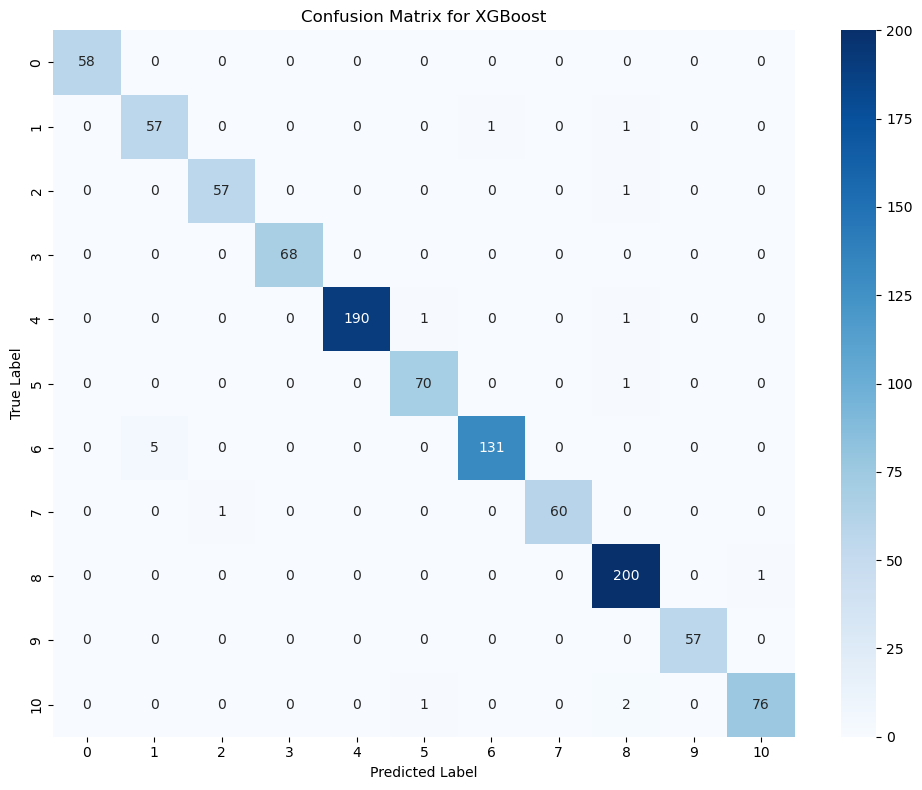

XGBoost model meets the accuracy target (≥90%).
Saved Random Forest model as it performed better.


In [20]:
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Evaluate predictions from trained models
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)


def evaluate_model(y_true, y_pred, model_name):
    """Evaluate a model and display performance metrics and confusion matrix."""
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name} Performance:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return accuracy


# Evaluate both models
rf_accuracy = evaluate_model(y_test, rf_pred, "Random Forest")
xgb_accuracy = evaluate_model(y_test, xgb_pred, "XGBoost")

# Report XGBoost performance against threshold
if xgb_accuracy >= 0.90:
    print("XGBoost model meets the accuracy target (≥90%).")
else:
    print(f"XGBoost accuracy ({xgb_accuracy:.4f}) is below the 90% target.")

# Save the better-performing model
model_dir = '../models'
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'trained_model.pkl')

if xgb_accuracy > rf_accuracy:
    joblib.dump(xgb_model, model_path)
    print("Saved XGBoost model as it performed better.")
else:
    joblib.dump(rf_model, model_path)
    print("Saved Random Forest model as it performed better.")
